In [ ]:
%pip install yfinance --upgrade --no-cache-dir

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# https://fred.stlouisfed.org/series/DFF
file_path = './DFF.csv'
data = pd.read_csv(file_path)

# 데이터프레임의 처음 몇 줄 확인
data.head()

start_date = "1995-01-01"

data['DATE'] = pd.to_datetime(data['DATE'])
filtered_data = data[data['DATE'] >= pd.to_datetime(start_date)]

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


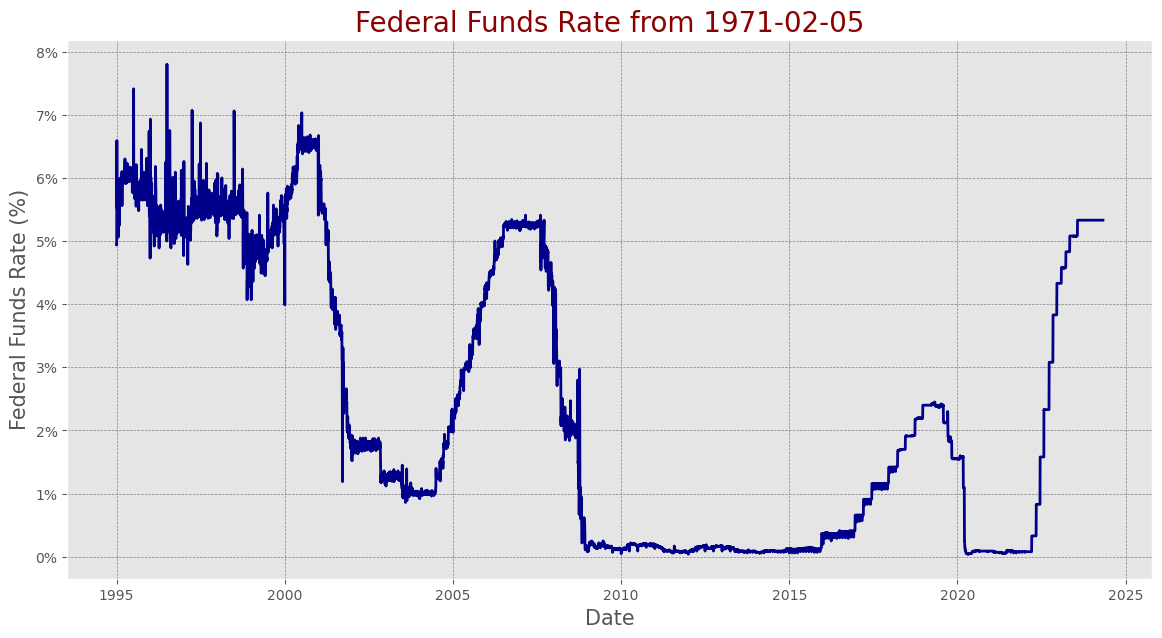

In [17]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data = filtered_data, x = filtered_data['DATE'], y= filtered_data['DFF'], color='darkblue', linewidth=2)

# 날짜 포맷터 설정
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 10년 단위로 변경
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Y축 포맷터 설정 (백분율로)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))

# 타이틀과 레이블 설정
ax.set_title('Federal Funds Rate from 1971-02-05', fontsize=20, color='darkred')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Federal Funds Rate (%)', fontsize=15)

# 그리드 추가
ax.grid(color='grey', linestyle='--', linewidth=0.5)

# 화면에 표시
plt.show()

In [ ]:
# 나스닥 지수의 심볼 설정 (NASDAQ Composite Index)
ticker_symbol = "^IXIC"

# 시작 날짜와 종료 날짜 설정
start_date = "1971-02-05"
end_date = "2024-04-29"

# yfinance를 사용하여 데이터 가져오기
ndata = yf.download(ticker_symbol, start=start_date, end=end_date)
ndata.to_csv("nasdaq_data.csv")

In [4]:
file_path = './nasdaq_data.csv'
nasdaq_data = pd.read_csv(file_path)
nasdaq_data
#nasdaq_data.info

<bound method DataFrame.info of              Date          Open          High           Low         Close  \
0      1971-02-05    100.000000    100.000000    100.000000    100.000000   
1      1971-02-08    100.839996    100.839996    100.839996    100.839996   
2      1971-02-09    100.760002    100.760002    100.760002    100.760002   
3      1971-02-10    100.690002    100.690002    100.690002    100.690002   
4      1971-02-11    101.449997    101.449997    101.449997    101.449997   
...           ...           ...           ...           ...           ...   
13417  2024-04-22  15396.129883  15539.000000  15265.660156  15451.309570   
13418  2024-04-23  15525.549805  15730.349609  15510.589844  15696.639648   
13419  2024-04-24  15805.599609  15839.000000  15634.440430  15712.750000   
13420  2024-04-25  15375.259766  15644.509766  15343.910156  15611.759766   
13421  2024-04-26  15821.339844  15981.000000  15770.719727  15927.900391   

          Adj Close      Volume  
0        

In [7]:
# 주간 변화율 계산 (금요일을 기준으로)
nasdaq_data.reset_index()
nasdaq_data['Weekly Change'] = nasdaq_data['Close'].pct_change(periods=5)

# 폭락 기준 (-10% 이상의 하락)
crash_threshold = -0.10

# 폭락한 주 찾기
crash_weeks = nasdaq_data[nasdaq_data['Weekly Change'] <= crash_threshold]

crash_weeks.head




<bound method NDFrame.head of              Date          Open          High           Low         Close  \
2308   1980-03-27    124.089996    124.089996    124.089996    124.089996   
4219   1987-10-19    394.500000    404.799988    360.200012    360.200012   
4220   1987-10-20    351.399994    351.399994    326.600006    327.799988   
4221   1987-10-21    343.700012    352.299988    343.700012    351.899994   
4222   1987-10-22    339.899994    341.799988    335.700012    336.100006   
...           ...           ...           ...           ...           ...   
12387  2020-03-18   6902.319824   7182.830078   6686.359863   6989.839844   
12389  2020-03-20   7248.069824   7354.439941   6854.669922   6879.520020   
12929  2022-05-11  11645.570312  11844.509766  11339.179688  11364.240234   
12951  2022-06-13  10986.849609  11071.480469  10775.139648  10809.230469   
12952  2022-06-14  10897.429688  10926.809570  10733.040039  10828.349609   

          Adj Close      Volume  Weekly Chang

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


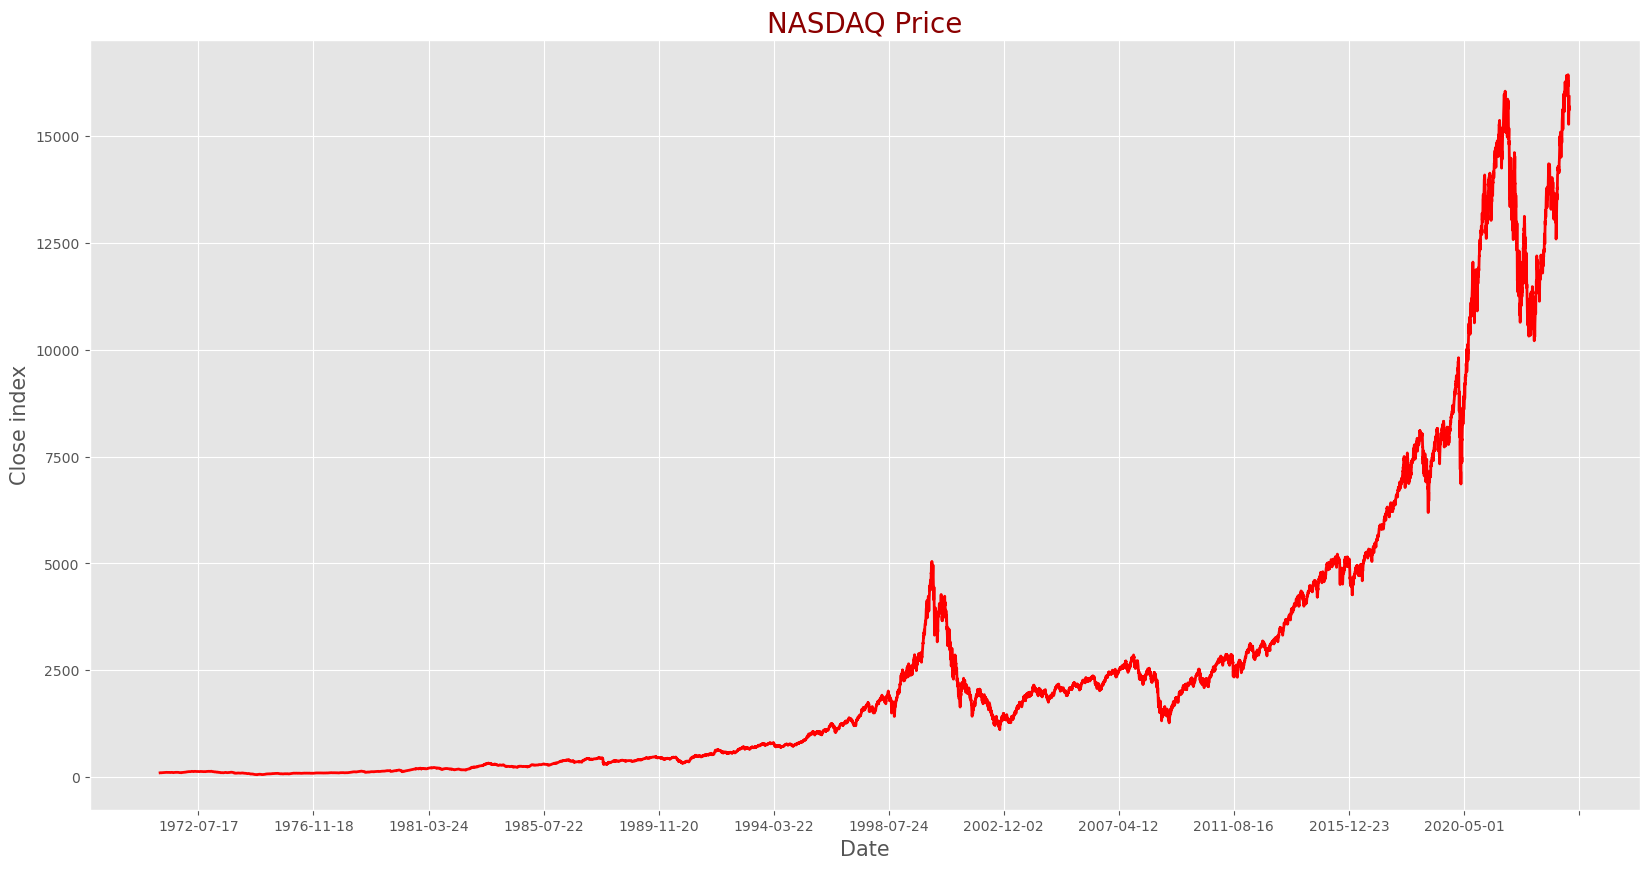

In [7]:
import matplotlib.dates as mdates

# 그래프 스타일 설정
#plt.style.use('ggplot')


# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 10))

#ax.plot(nasdaq_data['Date'], nasdaq_data['Close'], color='red', linewidth=2)
sns.lineplot(data = nasdaq_data, x= nasdaq_data['Date'], y= nasdaq_data['Close'], color='red', linewidth=2)


# crash_weeks = crash_weeks.copy()
# crash_weeks.dropna()

# crash_weeks['Date'] = pd.to_datetime(crash_weeks['Date'])

# for date in crash_weeks['Date']:
#     ax.axvspan(date, date + pd.Timedelta(days=1), color='yellow', alpha=0.3)


# 날짜 포맷터 설정
ax.xaxis.set_major_locator(mdates.YearLocator(3))  # 3년 단위로 변경


# 타이틀과 레이블 설정
ax.set_title('NASDAQ Price', fontsize=20, color='darkred')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Close index', fontsize=15)


# 그리드 추가
ax.grid(True)

# 화면에 표시
plt.show()

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


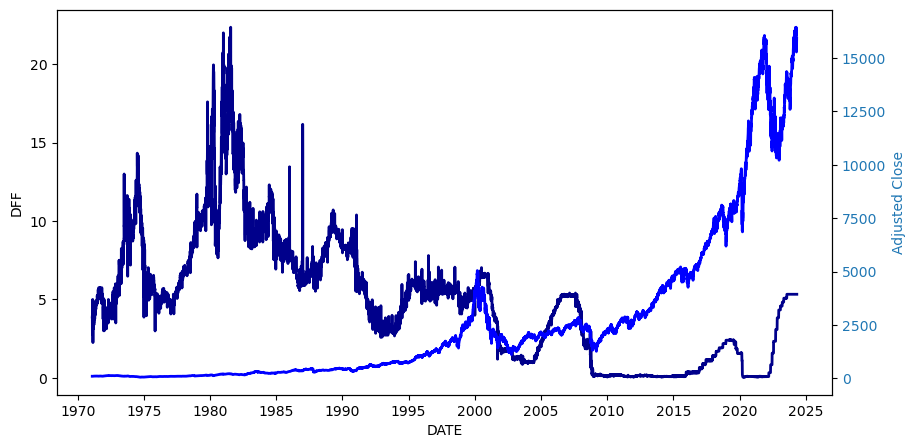

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 확인 및 전처리
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 5))

# Seaborn 라인 플롯
sns.lineplot(data = filtered_data, x = filtered_data['DATE'], y= filtered_data['DFF'], color='darkblue', linewidth=2)



# 두 번째 y축 설정
ax2 = ax1.twinx()
# 예시 데이터 사용하여 다른 y축 값 그리기
ax2.plot(nasdaq_data['Date'], nasdaq_data['Close'], color='blue', linewidth=2)  # 예시적 조정
ax2.set_ylabel('Adjusted Close', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# 날짜 포맷터 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()